## Detecção pela webcam 

In [ ]:
# This is needed to display the images.
%matplotlib inline
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
#tem que carregar da pasta correta...

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

from utils import label_map_util

from utils import visualization_utils as vis_util




    # What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')


opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, os.getcwd())
        
        
        
#MÉTODO otimizado de carregar o tensorflow sem muito custo...
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
#fazer o mapemento do label que ele dedecta para o que realmente é....tipo...label 5 quer dizer um 'carro' por exemplo

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


#funcao para otimizar o a entrada..
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

#funcao para puxar a webcam

# Using OpenCV to initialize the webcam
cap = cv2.VideoCapture(0)

with detection_graph.as_default():
    config = tf.ConfigProto(log_device_placement=False)
    config.gpu_options.allow_growth = False
    with tf.Session(graph=detection_graph, config=config) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')

        while True:
            ret, image_np = cap.read()
            image_np_expanded = np.expand_dims(image_np, axis=0)

            (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})

            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=10)
            
            cv2.imshow('MobileNet SSD - Object Detection', image_np)
            if cv2.waitKey(1) == 13: #13 is the Enter Key
                break
            
# Release camera and close windows
cap.release()
cv2.destroyAllWindows()   


## SDD rodando para um arquivo de vídeo LOCAL

In [ ]:
# This is needed to display the images.
%matplotlib inline
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
#tem que carregar da pasta correta...

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

from utils import label_map_util

from utils import visualization_utils as vis_util




    # What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')


opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, os.getcwd())
        
        
        
#MÉTODO otimizado de carregar o tensorflow sem muito custo...
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
#fazer o mapemento do label que ele dedecta para o que realmente é....tipo...label 5 quer dizer um 'carro' por exemplo

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


#funcao para otimizar o a entrada..
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

#funcao para puxar a webcam

# Using OpenCV to initialize the webcam
#cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('dashcam2.mp4')


with detection_graph.as_default():
    config = tf.ConfigProto(log_device_placement=False)
    config.gpu_options.allow_growth = False
    with tf.Session(graph=detection_graph, config=config) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')

        while True:
            ret, image_np = cap.read()
            image_np_expanded = np.expand_dims(image_np, axis=0)

            (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})

            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=10)
            
            cv2.imshow('MobileNet SSD - Object Detection', image_np)
            if cv2.waitKey(1) == 13: #13 is the Enter Key
                break
            
# Release camera and close windows
cap.release()
cv2.destroyAllWindows()  


## Visualizando dentro do JUPYTER 

In [2]:
 
#precisa instalar alguns pacotes.

#NO MAC
'''
brew install tcl-tk
pip install lxml
brew install protobuf
brew install pil




'''
'''
# For CPU
!pip install tensorflow
# For GPU
!pip install tensorflow-gpu
!pip install --user Cython
!pip install --user contextlib2
!pip install lxml
!pip install PIL

!pip install --user Cython
!pip install --user contextlib2
!pip install --user pillow
!pip install --user lxml



#Precisa configurar o COCOAPI
!git clone https://github.com/cocodataset/cocoapi.git


#parece que ele precisa links direto para o folder onde está as funcoes da COCOAPI
!cp object_detection_tutorial.ipynb  /Users/arnaldoljr/.virtualenvs/cv/lib/python3.7/site-packages/tensorflow/models/research/object_detection/


OBSERVACAO

Any model exported using the export_inference_graph.py tool can be loaded here simply 
by changing PATH_TO_FROZEN_GRAPH to point to a new .pb file.
By default we use an "SSD with Mobilenet" model here. See the detection model zoo
for a list of other models that can be run out-of-the-box with varying speeds and accuracies.



'''
# This is needed to display the images.
%matplotlib inline
%pylab inline 


import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
from IPython.display import clear_output

import matplotlib.pyplot as plt

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
#tem que carregar da pasta correta...

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

from utils import label_map_util

from utils import visualization_utils as vis_util




    # What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')


opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, os.getcwd())

def get_current_position(c):
    return int(c.get(0))
    #return int(c.get(CAP_PROP_POS_MSEC)/1000)
        
        
        
#MÉTODO otimizado de carregar o tensorflow sem muito custo...
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
#fazer o mapemento do label que ele dedecta para o que realmente é....tipo...label 5 quer dizer um 'carro' por exemplo

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


#funcao para otimizar o a entrada..
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

#funcao para puxar a webcam

# Using OpenCV to initialize the webcam
#cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('dashcam2.mp4')

with detection_graph.as_default():
    config = tf.ConfigProto(log_device_placement=False)
    config.gpu_options.allow_growth = False
    with tf.Session(graph=detection_graph, config=config) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
       
        while cap.isOpened():
            ret, image_np = cap.read()
            image_np_expanded = np.expand_dims(image_np, axis=0)

            (boxes, scores, classes, num) = sess.run([detection_boxes, detection_scores, detection_classes, num_detections],feed_dict={image_tensor: image_np_expanded})

            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=10)
                #orig
                #cv2.imshow('MobileNet SSD - Object Detection', image_np)
                #teste1
                #plt.imshow(image_np)
                #plt.show()
                #teste2
                # Convert the image from OpenCV BGR format to matplotlib RGB format
                # to display the image
            frame = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
            

            #print(scores)
            # Turn off the axis
            axis('off')
            # Title of the window
            title("Input Stream")
            # Display the frame
            imshow(frame)
            show()
            # Display the frame until new frame is available
            clear_output(wait=True)
        
            #if cv2.waitKey(1) == 13: #13 is the Enter Key 
                #break

# Release camera and close windows
#cap.release()
#cv2.destroyAllWindows()  



KeyboardInterrupt: 

## Para otimizar o aprendizado vou fazer um scrapy do youtube com Beautiful Soup e jogar para o modelo.....

## TESTE RODANDO DIRETO DO YOUTUBE

In [3]:

#precisa instalar alguns pacotes.

#NO MAC
'''
brew install tcl-tk
pip install lxml
brew install protobuf
brew install pil




'''
'''
# For CPU
!pip install tensorflow
# For GPU
!pip install tensorflow-gpu
!pip install --user Cython
!pip install --user contextlib2
!pip install lxml
!pip install PIL

!pip install --user Cython
!pip install --user contextlib2
!pip install --user pillow
!pip install --user lxml



#Precisa configurar o COCOAPI
!git clone https://github.com/cocodataset/cocoapi.git


#parece que ele precisa links direto para o folder onde está as funcoes da COCOAPI
!cp object_detection_tutorial.ipynb  /Users/arnaldoljr/.virtualenvs/cv/lib/python3.7/site-packages/tensorflow/models/research/object_detection/


OBSERVACAO

Any model exported using the export_inference_graph.py tool can be loaded here simply 
by changing PATH_TO_FROZEN_GRAPH to point to a new .pb file.
By default we use an "SSD with Mobilenet" model here. See the detection model zoo
for a list of other models that can be run out-of-the-box with varying speeds and accuracies.



'''
# This is needed to display the images.
%matplotlib inline
%pylab inline 


import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
from IPython.display import clear_output
import pafy


import matplotlib.pyplot as plt

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
#tem que carregar da pasta correta...

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

from utils import label_map_util

from utils import visualization_utils as vis_util




    # What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')


opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, os.getcwd())

def get_current_position(c):
    return int(c.get(0))
    #return int(c.get(CAP_PROP_POS_MSEC)/1000)
        
        
        
#MÉTODO otimizado de carregar o tensorflow sem muito custo...
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
#fazer o mapemento do label que ele dedecta para o que realmente é....tipo...label 5 quer dizer um 'carro' por exemplo

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


#funcao para otimizar o a entrada..
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

#funcao para puxar do youtube

#url = "https://www.youtube.com/watch?v=qAmKsKo2cgMu
url = "www.youtube.com/watch?v=FtAcLvuO7Qg"
video = pafy.new(url)
best = video.getbest(preftype="mp4")

#start the video
cap = cv2.VideoCapture(best.url)



# Using OpenCV to initialize the webcam
#cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture('dashcam2.mp4')

with detection_graph.as_default():
    config = tf.ConfigProto(log_device_placement=False)
    config.gpu_options.allow_growth = False
    with tf.Session(graph=detection_graph, config=config) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
       
        while cap.isOpened():
            ret, image_np = cap.read()
            image_np_expanded = np.expand_dims(image_np, axis=0)

            (boxes, scores, classes, num) = sess.run([detection_boxes, detection_scores, detection_classes, num_detections],feed_dict={image_tensor: image_np_expanded})

            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=10)
                #orig
                #cv2.imshow('MobileNet SSD - Object Detection', image_np)
                #teste1
                #plt.imshow(image_np)
                #plt.show()
                #teste2
                # Convert the image from OpenCV BGR format to matplotlib RGB format
                # to display the image
            frame = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
            

            #print(scores)
            # Turn off the axis
            axis('off')
            # Title of the window
            title("Input Stream")
            # Display the frame
            imshow(frame)
            show()
            # Display the frame until new frame is available
            clear_output(wait=True)
        
            #if cv2.waitKey(1) == 13: #13 is the Enter Key 
                #break

# Release camera and close windows
#cap.release()
#cv2.destroyAllWindows()  



KeyboardInterrupt: 

In [ ]:
## O srapy foi feito para dentro do links.csv
#pego o título e o url do vídeo para treinar/validar o modelo
!cat links.csv

## Vamos extrair informações do vídeo....



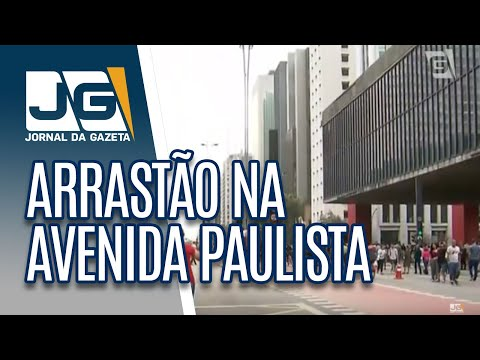

In [4]:
#video para o treino
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('I4iz_wAM0nk') 

In [6]:

#precisa instalar alguns pacotes.

#NO MAC
'''
brew install tcl-tk
pip install lxml
brew install protobuf
brew install pil




'''
'''
# For CPU
!pip install tensorflow
# For GPU
!pip install tensorflow-gpu
!pip install --user Cython
!pip install --user contextlib2
!pip install lxml
!pip install PIL

!pip install --user Cython
!pip install --user contextlib2
!pip install --user pillow
!pip install --user lxml



#Precisa configurar o COCOAPI
!git clone https://github.com/cocodataset/cocoapi.git


#parece que ele precisa links direto para o folder onde está as funcoes da COCOAPI
!cp object_detection_tutorial.ipynb  /Users/arnaldoljr/.virtualenvs/cv/lib/python3.7/site-packages/tensorflow/models/research/object_detection/


OBSERVACAO

Any model exported using the export_inference_graph.py tool can be loaded here simply 
by changing PATH_TO_FROZEN_GRAPH to point to a new .pb file.
By default we use an "SSD with Mobilenet" model here. See the detection model zoo
for a list of other models that can be run out-of-the-box with varying speeds and accuracies.



'''
# This is needed to display the images.
%matplotlib inline
%pylab inline 


import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
from IPython.display import clear_output
import pafy
import csv 
import pandas as pd



import matplotlib.pyplot as plt

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
#tem que carregar da pasta correta...

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

from utils import label_map_util

from utils import visualization_utils as vis_util




    # What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')


opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, os.getcwd())

def get_current_position(c):
    return int(c.get(0))
    #return int(c.get(CAP_PROP_POS_MSEC)/1000)
        
        
        
#MÉTODO otimizado de carregar o tensorflow sem muito custo...
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
#fazer o mapemento do label que ele dedecta para o que realmente é....tipo...label 5 quer dizer um 'carro' por exemplo

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


#funcao para otimizar o a entrada..
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

#funcao para puxar do youtube

#url = "https://www.youtube.com/watch?v=qAmKsKo2cgMu
url = "www.youtube.com/watch?v=I4iz_wAM0nk"
#url = "www.youtube.com/watch?v=FtAcLvuO7Qg"
video = pafy.new(url)
best = video.getbest(preftype="mp4")

#start the video
#cap = cv2.VideoCapture(best.url)



# Using OpenCV to initialize the webcam
#cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('dashcam2.mp4')


#matriz para compor a rede neural 
matriz =  csv.writer(open("dadosReconhecidos.csv","w"))
with detection_graph.as_default():
    config = tf.ConfigProto(log_device_placement=False)
    config.gpu_options.allow_growth = False
    with tf.Session(graph=detection_graph, config=config) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
       
        while cap.isOpened():
            ret, image_np = cap.read()
            image_np_expanded = np.expand_dims(image_np, axis=0)

            (boxes, scores, classes, num) = sess.run([detection_boxes, detection_scores, detection_classes, num_detections],feed_dict={image_tensor: image_np_expanded})

            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=10)
                #orig
                #cv2.imshow('MobileNet SSD - Object Detection', image_np)
                #teste1
                #plt.imshow(image_np)
                #plt.show()
                #teste2
                # Convert the image from OpenCV BGR format to matplotlib RGB format
                # to display the image
            frame = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
            millis = get_current_position(cap)
            #print(millis)
            #print("\n..............\n")
            '''
            data = {}
            i=0
            while ((output_dict['detection_scores'][i]) > 0.49999):
                chave = output_dict['detection_classes'][i]
                #print((output_dict['detection_scores'][i]))
                data.setdefault(chave,[]).append(output_dict['detection_scores'][i])
                i+=1


            print(data)    

            '''
            #nao vou usar em um primeiro momento 
            #Coordenadasboxes= np.squeeze(boxes) 
            ClassesCoordenadas = np.squeeze(classes).astype(np.int32)
            Scoresdetectados = np.squeeze(scores)
            #Indcateg = category_index
            #visualizando
            '''
            print('..........\n')
            print(ClassesCoordenadas)
            print('.....\n')
            print(Scoresdetectados)
            
            '''
            data = {}
            i=1
            while ((Scoresdetectados[i]) > 0.49999):
                chave = ClassesCoordenadas[i]
                #print((output_dict['detection_scores'][i]))
                #data.setdefault(chave,[]).append(ClassesCoordenadas[i])
                data.setdefault(chave,[]).append(i)
                i+=1
            LisCh = list(data.keys())
            #TamLisCh = len(list(data.keys()))
            LisVal = list(data.values())
            
            print("\n.......\n")
            print("Tempo Frame - ",millis)
            print("Extr. do Frame - ",data)
            listaDados = [millis,data]
            for i in range(len(list(data.keys()))):
                print("Obj Encontrado - ",LisCh[i])
                listaDados.append(LisCh[i])
                print("Qtd Obj. Econtrados - ",len(LisVal[i]))
                listaDados.append(len(LisVal[i])/100)
                
            matriz.writerow(listaDados)
            

            print("\n.......\n")
            '''
            for key in data:
                print(millis,data,key,data[key],len(data[key]))
                matriz.writerow([millis,data,key,data[key],len(data[key])]) 

            '''

            #print(millis,ke)
            #criaando o database..
            
            '''
            with open('arqVideo.txt','a') as arq:
                arq.write("Tempo em milissegundos {} \n".format(millis)+"\n")
                #arq.write("Coordenadas dections boxes: {} \n".format(Coordenadasboxes)+"\n")

                arq.write("Classes Coordenadas: {} \n".format(ClassesCoordenadas) +"\n")
                arq.write("Scores detectados: {} \n".format(Scoresdetectados)+"\n")
                #arq.write("Índices de Categorias: {} \n".format(Indcateg)+"\n")

            arq.close()
            
            
            #só rodar quando precisa visualizar .....
            
            #print(scores)
            # Turn off the axis
            axis('off')
            # Title of the window
            title("Input Stream")
            # Display the frame
            imshow(frame)
            show()
            # Display the frame until new frame is available
            clear_output(wait=True)
            '''
            
            
        
                
            if cv2.waitKey(1) == 13: #13 is the Enter Key 
                sys.exit()
                #break


# Release camera and close windows
#cap.release()
#cv2.destroyAllWindows()  


Populating the interactive namespace from numpy and matplotlib

.......

Tempo Frame -  33
Extr. do Frame -  {1: [1, 2, 3]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  3

.......


.......

Tempo Frame -  66
Extr. do Frame -  {1: [1, 2, 4, 5], 3: [3]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  4
Obj Encontrado -  3
Qtd Obj. Econtrados -  1

.......


.......

Tempo Frame -  100
Extr. do Frame -  {1: [1, 2, 3], 3: [4]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  3
Obj Encontrado -  3
Qtd Obj. Econtrados -  1

.......


.......

Tempo Frame -  133
Extr. do Frame -  {1: [1, 2, 3, 5], 3: [4]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  4
Obj Encontrado -  3
Qtd Obj. Econtrados -  1

.......


.......

Tempo Frame -  166
Extr. do Frame -  {1: [1, 3, 4, 5, 6], 3: [2]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  5
Obj Encontrado -  3
Qtd Obj. Econtrados -  1

.......


.......

Tempo Frame -  200
Extr. do Frame -  {1: [1, 2, 4, 5], 3: [3]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  4
Obj Encontra


.......

Tempo Frame -  1700
Extr. do Frame -  {1: [1, 2, 3, 4]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  4

.......


.......

Tempo Frame -  1733
Extr. do Frame -  {1: [1, 2, 3, 4]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  4

.......


.......

Tempo Frame -  1766
Extr. do Frame -  {1: [1, 2, 3, 4]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  4

.......


.......

Tempo Frame -  1800
Extr. do Frame -  {1: [1, 2, 3, 4]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  4

.......


.......

Tempo Frame -  1833
Extr. do Frame -  {1: [1, 2, 3, 4]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  4

.......


.......

Tempo Frame -  1866
Extr. do Frame -  {1: [1, 2, 3]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  3

.......


.......

Tempo Frame -  1900
Extr. do Frame -  {1: [1, 4], 3: [2, 3]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  2
Obj Encontrado -  3
Qtd Obj. Econtrados -  2

.......


.......

Tempo Frame -  1933
Extr. do Frame -  {1: [1], 3: [2, 3]}
Obj Encontrado -  1
Qtd Obj. Econtrado


.......

Tempo Frame -  3466
Extr. do Frame -  {1: [1]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  1

.......


.......

Tempo Frame -  3500
Extr. do Frame -  {1: [1]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  1

.......


.......

Tempo Frame -  3533
Extr. do Frame -  {1: [1, 2]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  2

.......


.......

Tempo Frame -  3566
Extr. do Frame -  {1: [1, 2, 3], 3: [4]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  3
Obj Encontrado -  3
Qtd Obj. Econtrados -  1

.......


.......

Tempo Frame -  3600
Extr. do Frame -  {1: [1, 3, 4], 3: [2]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  3
Obj Encontrado -  3
Qtd Obj. Econtrados -  1

.......


.......

Tempo Frame -  3633
Extr. do Frame -  {1: [1, 2, 3], 3: [4]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  3
Obj Encontrado -  3
Qtd Obj. Econtrados -  1

.......


.......

Tempo Frame -  3666
Extr. do Frame -  {1: [1, 3], 3: [2]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  2
Obj Encontrado -  3
Qtd Obj. Econtr


.......

Tempo Frame -  5566
Extr. do Frame -  {1: [1, 3], 3: [2]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  2
Obj Encontrado -  3
Qtd Obj. Econtrados -  1

.......


.......

Tempo Frame -  5600
Extr. do Frame -  {1: [1, 2, 3]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  3

.......


.......

Tempo Frame -  5633
Extr. do Frame -  {1: [1, 2]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  2

.......


.......

Tempo Frame -  5666
Extr. do Frame -  {1: [1, 2]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  2

.......


.......

Tempo Frame -  5700
Extr. do Frame -  {1: [1, 2, 3]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  3

.......


.......

Tempo Frame -  5733
Extr. do Frame -  {1: [1, 2, 3, 4]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  4

.......


.......

Tempo Frame -  5766
Extr. do Frame -  {1: [1, 2, 3, 5], 3: [4]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  4
Obj Encontrado -  3
Qtd Obj. Econtrados -  1

.......


.......

Tempo Frame -  5800
Extr. do Frame -  {1: [1, 3], 3: [2]}
Obj


.......

Tempo Frame -  7300
Extr. do Frame -  {1: [1, 4, 5, 6], 3: [2, 3, 7]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  4
Obj Encontrado -  3
Qtd Obj. Econtrados -  3

.......


.......

Tempo Frame -  7333
Extr. do Frame -  {1: [1, 4, 5], 3: [2, 3, 6]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  3
Obj Encontrado -  3
Qtd Obj. Econtrados -  3

.......


.......

Tempo Frame -  7366
Extr. do Frame -  {3: [1, 2, 3], 1: [4, 5]}
Obj Encontrado -  3
Qtd Obj. Econtrados -  3
Obj Encontrado -  1
Qtd Obj. Econtrados -  2

.......


.......

Tempo Frame -  7400
Extr. do Frame -  {3: [1, 2, 5], 1: [3, 4]}
Obj Encontrado -  3
Qtd Obj. Econtrados -  3
Obj Encontrado -  1
Qtd Obj. Econtrados -  2

.......


.......

Tempo Frame -  7433
Extr. do Frame -  {1: [1, 2, 3, 4]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  4

.......


.......

Tempo Frame -  7466
Extr. do Frame -  {1: [1, 2, 3, 4]}
Obj Encontrado -  1
Qtd Obj. Econtrados -  4

.......


.......

Tempo Frame -  7500
Extr. do Frame -  {1: [


.......

Tempo Frame -  9100
Extr. do Frame -  {3: [1, 2, 3, 4]}
Obj Encontrado -  3
Qtd Obj. Econtrados -  4

.......


.......

Tempo Frame -  9133
Extr. do Frame -  {3: [1, 2, 3, 4, 5, 6]}
Obj Encontrado -  3
Qtd Obj. Econtrados -  6

.......


.......

Tempo Frame -  9166
Extr. do Frame -  {3: [1, 2, 3, 5, 6], 1: [4]}
Obj Encontrado -  3
Qtd Obj. Econtrados -  5
Obj Encontrado -  1
Qtd Obj. Econtrados -  1

.......


.......

Tempo Frame -  9200
Extr. do Frame -  {3: [1, 2, 3, 4, 5]}
Obj Encontrado -  3
Qtd Obj. Econtrados -  5

.......


.......

Tempo Frame -  9233
Extr. do Frame -  {3: [1, 2, 4, 5], 1: [3]}
Obj Encontrado -  3
Qtd Obj. Econtrados -  4
Obj Encontrado -  1
Qtd Obj. Econtrados -  1

.......


.......

Tempo Frame -  9266
Extr. do Frame -  {3: [1, 2, 3, 4, 5]}
Obj Encontrado -  3
Qtd Obj. Econtrados -  5

.......


.......

Tempo Frame -  9300
Extr. do Frame -  {3: [1, 2, 3, 4], 1: [5]}
Obj Encontrado -  3
Qtd Obj. Econtrados -  4
Obj Encontrado -  1
Qtd Obj. Econt


.......

Tempo Frame -  11166
Extr. do Frame -  {3: [1, 2, 3, 4, 5]}
Obj Encontrado -  3
Qtd Obj. Econtrados -  5

.......


.......

Tempo Frame -  11200
Extr. do Frame -  {3: [1, 2, 3, 4, 7], 1: [5, 6]}
Obj Encontrado -  3
Qtd Obj. Econtrados -  5
Obj Encontrado -  1
Qtd Obj. Econtrados -  2

.......


.......

Tempo Frame -  11233
Extr. do Frame -  {3: [1, 2, 3], 1: [4]}
Obj Encontrado -  3
Qtd Obj. Econtrados -  3
Obj Encontrado -  1
Qtd Obj. Econtrados -  1

.......


.......

Tempo Frame -  11266
Extr. do Frame -  {3: [1, 2, 4], 1: [3]}
Obj Encontrado -  3
Qtd Obj. Econtrados -  3
Obj Encontrado -  1
Qtd Obj. Econtrados -  1

.......


.......

Tempo Frame -  11300
Extr. do Frame -  {3: [1, 3], 1: [2, 4]}
Obj Encontrado -  3
Qtd Obj. Econtrados -  2
Obj Encontrado -  1
Qtd Obj. Econtrados -  2

.......


.......

Tempo Frame -  11333
Extr. do Frame -  {3: [1, 2, 3, 4], 1: [5]}
Obj Encontrado -  3
Qtd Obj. Econtrados -  4
Obj Encontrado -  1
Qtd Obj. Econtrados -  1

.......


..

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [9]:
# This is needed to display the images.
%matplotlib inline
# This is needed to display the images.
%matplotlib inline
%pylab inline 


import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
from IPython.display import clear_output
import pafy


import matplotlib.pyplot as plt

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
#tem que carregar da pasta correta...

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

from utils import label_map_util

from utils import visualization_utils as vis_util





    # What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')


opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, os.getcwd())
        
        
        
#MÉTODO otimizado de carregar o tensorflow sem muito custo...
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
#fazer o mapemento do label que ele dedecta para o que realmente é....tipo...label 5 quer dizer um 'carro' por exemplo

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


#funcao para otimizar o a entrada..
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

#funcao para puxar do youtube

#url = "https://www.youtube.com/watch?v=qAmKsKo2cgMu
#url = "www.youtube.com/watch?v=FtAcLvuO7Qg"
url = "https://www.youtube.com/watch?v=I4iz_wAM0nk"
video = pafy.new(url)
best = video.getbest(preftype="mp4")

#start the video
cap = cv2.VideoCapture(best.url)


with detection_graph.as_default():
    config = tf.ConfigProto(log_device_placement=False)
    config.gpu_options.allow_growth = False
    with tf.Session(graph=detection_graph, config=config) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')

        while True:
            ret, image_np = cap.read()
            image_np_expanded = np.expand_dims(image_np, axis=0)

            (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})

            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=10)
            
            cv2.imshow('MobileNet SSD - Object Detection', image_np)
            if cv2.waitKey(1) == 13: #13 is the Enter Key
                break
            
# Release camera and close windows
cap.release()
cv2.destroyAllWindows()  


Populating the interactive namespace from numpy and matplotlib


In [ ]:
!ls

In [7]:
!cat dadosReconhecidos.csv

In [8]:

#precisa instalar alguns pacotes.

#NO MAC
'''
brew install tcl-tk
pip install lxml
brew install protobuf
brew install pil




'''
'''
# For CPU
!pip install tensorflow
# For GPU
!pip install tensorflow-gpu
!pip install --user Cython
!pip install --user contextlib2
!pip install lxml
!pip install PIL

!pip install --user Cython
!pip install --user contextlib2
!pip install --user pillow
!pip install --user lxml



#Precisa configurar o COCOAPI
!git clone https://github.com/cocodataset/cocoapi.git


#parece que ele precisa links direto para o folder onde está as funcoes da COCOAPI
!cp object_detection_tutorial.ipynb  /Users/arnaldoljr/.virtualenvs/cv/lib/python3.7/site-packages/tensorflow/models/research/object_detection/


OBSERVACAO

Any model exported using the export_inference_graph.py tool can be loaded here simply 
by changing PATH_TO_FROZEN_GRAPH to point to a new .pb file.
By default we use an "SSD with Mobilenet" model here. See the detection model zoo
for a list of other models that can be run out-of-the-box with varying speeds and accuracies.



'''
# This is needed to display the images.
%matplotlib inline
%pylab inline 


import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
from IPython.display import clear_output
import pafy


import matplotlib.pyplot as plt

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
#tem que carregar da pasta correta...

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

from utils import label_map_util

from utils import visualization_utils as vis_util




    # What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')


opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, os.getcwd())

def get_current_position(c):
    return int(c.get(0))
    #return int(c.get(CAP_PROP_POS_MSEC)/1000)
        
        
        
#MÉTODO otimizado de carregar o tensorflow sem muito custo...
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
#fazer o mapemento do label que ele dedecta para o que realmente é....tipo...label 5 quer dizer um 'carro' por exemplo

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


#funcao para otimizar o a entrada..
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

#funcao para puxar do youtube

#url = "https://www.youtube.com/watch?v=qAmKsKo2cgMu
#url = "www.youtube.com/watch?v=FtAcLvuO7Qg"
url = "https://www.youtube.com/watch?v=I4iz_wAM0nk"
video = pafy.new(url)
best = video.getbest(preftype="mp4")

#start the video
cap = cv2.VideoCapture(best.url)



# Using OpenCV to initialize the webcam
#cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture('dashcam2.mp4')

with detection_graph.as_default():
    config = tf.ConfigProto(log_device_placement=False)
    config.gpu_options.allow_growth = False
    with tf.Session(graph=detection_graph, config=config) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
       
        while cap.isOpened():
            ret, image_np = cap.read()
            image_np_expanded = np.expand_dims(image_np, axis=0)

            (boxes, scores, classes, num) = sess.run([detection_boxes, detection_scores, detection_classes, num_detections],feed_dict={image_tensor: image_np_expanded})

            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=10)
                #orig
                #cv2.imshow('MobileNet SSD - Object Detection', image_np)
                #teste1
                #plt.imshow(image_np)
                #plt.show()
                #teste2
                # Convert the image from OpenCV BGR format to matplotlib RGB format
                # to display the image
            frame = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
            

            #print(scores)
            # Turn off the axis
            axis('off')
            # Title of the window
            title("Input Stream")
            # Display the frame
            imshow(frame)
            show()
            # Display the frame until new frame is available
            clear_output(wait=True)
        
            #if cv2.waitKey(1) == 13: #13 is the Enter Key 
                #break

# Release camera and close windows
#cap.release()
#cv2.destroyAllWindows()  



KeyboardInterrupt: 

## AGORA VAMOS EXTRAIR AS INFORMAÇÕES DO VÍDEO

In [ ]:

#precisa instalar alguns pacotes.

#NO MAC
'''
brew install tcl-tk
pip install lxml
brew install protobuf
brew install pil




'''
'''
# For CPU
!pip install tensorflow
# For GPU
!pip install tensorflow-gpu
!pip install --user Cython
!pip install --user contextlib2
!pip install lxml
!pip install PIL

!pip install --user Cython
!pip install --user contextlib2
!pip install --user pillow
!pip install --user lxml



#Precisa configurar o COCOAPI
!git clone https://github.com/cocodataset/cocoapi.git


#parece que ele precisa links direto para o folder onde está as funcoes da COCOAPI
!cp object_detection_tutorial.ipynb  /Users/arnaldoljr/.virtualenvs/cv/lib/python3.7/site-packages/tensorflow/models/research/object_detection/


OBSERVACAO

Any model exported using the export_inference_graph.py tool can be loaded here simply 
by changing PATH_TO_FROZEN_GRAPH to point to a new .pb file.
By default we use an "SSD with Mobilenet" model here. See the detection model zoo
for a list of other models that can be run out-of-the-box with varying speeds and accuracies.



'''
# This is needed to display the images.
%matplotlib inline
%pylab inline 


import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
from IPython.display import clear_output
import pafy
import csv 
import pandas as pd



import matplotlib.pyplot as plt

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
#tem que carregar da pasta correta...

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

from utils import label_map_util

from utils import visualization_utils as vis_util




    # What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')


opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, os.getcwd())

def get_current_position(c):
    return int(c.get(0))
    #return int(c.get(CAP_PROP_POS_MSEC)/1000)
        
        
        
#MÉTODO otimizado de carregar o tensorflow sem muito custo...
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
#fazer o mapemento do label que ele dedecta para o que realmente é....tipo...label 5 quer dizer um 'carro' por exemplo

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


#funcao para otimizar o a entrada..
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

#funcao para puxar do youtube

#url = "https://www.youtube.com/watch?v=qAmKsKo2cgMu
#url = "www.youtube.com/watch?v=FtAcLvuO7Qg"
url = "www.youtube.com/watch?v=I4iz_wAM0nk"
video = pafy.new(url)
best = video.getbest(preftype="mp4")

#start the video
cap = cv2.VideoCapture(best.url)
# Using OpenCV to initialize the webcam
#cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture('dashcam2.mp4')


df = pd.DataFrame()

#matriz para compor a rede neural 
matriz =  csv.writer(open("Reuniao11.csv","w"))
with detection_graph.as_default():
    config = tf.ConfigProto(log_device_placement=False)
    config.gpu_options.allow_growth = False
    with tf.Session(graph=detection_graph, config=config) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
       
        while cap.isOpened():
            ret, image_np = cap.read()
            image_np_expanded = np.expand_dims(image_np, axis=0)

            (boxes, scores, classes, num) = sess.run([detection_boxes, detection_scores, detection_classes, num_detections],feed_dict={image_tensor: image_np_expanded})

            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=10)
                #orig
                #cv2.imshow('MobileNet SSD - Object Detection', image_np)
                #teste1
                #plt.imshow(image_np)
                #plt.show()
                #teste2
                # Convert the image from OpenCV BGR format to matplotlib RGB format
                # to display the image
            frame = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
            millis = get_current_position(cap)
            #print(millis)
            #print("\n..............\n")
            '''
            data = {}
            i=0
            while ((output_dict['detection_scores'][i]) > 0.49999):
                chave = output_dict['detection_classes'][i]
                #print((output_dict['detection_scores'][i]))
                data.setdefault(chave,[]).append(output_dict['detection_scores'][i])
                i+=1


            print(data)    

            '''
            #nao vou usar em um primeiro momento 
            #Coordenadasboxes= np.squeeze(boxes) 
            ClassesCoordenadas = np.squeeze(classes).astype(np.int32)
            Scoresdetectados = np.squeeze(scores)
            #Indcateg = category_index
            #visualizando
            '''
            print('..........\n')
            print(ClassesCoordenadas)
            print('.....\n')
            print(Scoresdetectados)
            
            '''

            data = {}
            i=1
            while ((Scoresdetectados[i]) > 0.49999):
                chave = ClassesCoordenadas[i]
                #print((output_dict['detection_scores'][i]))
                #data.setdefault(chave,[]).append(ClassesCoordenadas[i])
                data.setdefault(chave,[]).append(i)
                i+=1
            LisCh = list(data.keys())
            #TamLisCh = len(list(data.keys()))
            LisVal = list(data.values())
            
            #print("\n.......\n")
            #print("Tempo Frame - ",millis)
            #print("Extr. do Frame - ",data)
            #listaDados = [millis,data]
            listaDados = [millis]
            for i in range(len(list(data.keys()))):
                #print("Obj Encontrado - ",LisCh[i])
                listaDados.append(LisCh[i])
                #print("Qtd Obj. Econtrados - ",len(LisVal[i]))
                listaDados.append(len(LisVal[i])/100)
            
            a_series = pd.Series(listaDados)
            #dfTeste = dfTeste.append(a_series, ignore_index=True)
            df = pd.concat([df,a_series])
            #print(listaDados)    
            matriz.writerow(listaDados)
            with open('arqVideoR11.txt','a') as arq:
                arq.writelines(str(listaDados)+";\n|")
            arq.close()
            

            #print("\n.......\n")
            '''
            for key in data:
                print(millis,data,key,data[key],len(data[key]))
                matriz.writerow([millis,data,key,data[key],len(data[key])]) 

            '''

            #print(millis,ke)
            #criaando o database..
            
            '''
            with open('arqVideo.txt','a') as arq:
                arq.write("Tempo em milissegundos {} \n".format(millis)+"\n")
                #arq.write("Coordenadas dections boxes: {} \n".format(Coordenadasboxes)+"\n")

                arq.write("Classes Coordenadas: {} \n".format(ClassesCoordenadas) +"\n")
                arq.write("Scores detectados: {} \n".format(Scoresdetectados)+"\n")
                #arq.write("Índices de Categorias: {} \n".format(Indcateg)+"\n")

            arq.close()
            
            
            #só rodar quando precisa visualizar .....
            
            #print(scores)
            # Turn off the axis
            axis('off')
            # Title of the window
            title("Input Stream")
            # Display the frame
            imshow(frame)
            show()
            # Display the frame until new frame is available
            clear_output(wait=True)
            '''
            
            
        
                
            if cv2.waitKey(1) == 13: #13 is the Enter Key 
                sys.exit()
                #break


# Release camera and close windows
#cap.release()
#cv2.destroyAllWindows()  


In [ ]:
!cat arqVideoR1.txt

In [ ]:
!cat arqVideoR11.txt

In [ ]:
fname = "arqVideoR1.txt"
count = 0
with open(fname, 'r') as f:
    for line in f:
        count += 1
print("Total number of lines is:", count)


In [ ]:
fname = "arqVideoR11.txt"
count = 0
with open(fname, 'r') as f:
    for line in f:
        count += 1
print("Total number of lines is:", count)


In [ ]:
#dataframe de dados...
df

In [ ]:
#shape do dataframe 
df.shape

In [ ]:
!cat Reuniao1.csv

In [ ]:
!cat Reuniao11.csv

In [ ]:
#preciso saber se está mandando tudo para o CSV 
input_file = open("Reuniao1.csv","r+")
reader_file = csv.reader(input_file)
value = len(list(reader_file))
value

In [ ]:
#preciso saber se está mandando tudo para o CSV 
input_file = open("Reuniao11.csv","r+")
reader_file = csv.reader(input_file)
value = len(list(reader_file))
value

**É PRECISO VERIFICAR A CARDINALIDADE DO CONJUNTO FUZZY CRIADO DE ACORDO COM O TAMANHO DO VÍDEO **

* O Vídeo possui 2 minutos e 3 segundos....são 123 segundos... 123000 ms 

* O tempo de precessamento mínimo de frama da máquina é 33ms aproximandamente, logo temos 3727.27273 partes de processamento. Teoricamente são 3728 componentes de aprendizagem. 

* Há um problema de cardinalizade/perca de dados...vou tratar com os dados do "Reuniao1.csv" devido à confiabiliade dos dados.

## PROCEDIMENTO DE APRENDIZAGEM 
<em> A análise do vídeo é feita para montar o passo inicial do Aprendizado. Esse é um exemplo que usará somente 1 vídeo para aprender...no caso o linkado em cima...  </em>!

**Faço uma avaliaçao das regiões de interesse e fuzzyfico as informações** 

**BASICAMENTE UMA ANOMALIA EM UM VÍDEO É OUTLIER DA NORMALIZADE DO VÍDEO** 

**NO NOSSO CASO..... É AÍ QUE QUERO ATACAR** 

* Início do vídeo...mantenho zerado 

* Em 0:38 começa a função trapézio...

* 0:48 atinge um primeiro pico até 0:50 e caí rapidamente...lembrando..está em milissegundos..logo todas as quedas ainda aprensentam seu papel no conjunto fuzzy. Não sei até que ponto isso é válido, já que pode jogar um viés nos dados...ou poliur as informações

* Mantenho zerado até 1:00 e vou subindo aos poucos até 1:03 e mantenho o pico até 1:08.

* Deixo zerado até 1:21 e começo a subir...coloco o pico em 1:23 ...1:35 começo a descer...1:37 já zero...há pouca qualidade...ZOOM MUITO FORTE - preciso fazer um teste para avaliar se esse tipo de informação é ou não útil...1:47 eu zero.. e mantenho até o final...

*
**Há o problema de determinar a cardinalidade dos dados...preciso saber o tempo de análise de 1 Frame de vídeo da máquina para particionar os ms**

In [ ]:
!cat Reuniao11.csv

In [ ]:
#TESTE
from openpyxl import Workbook
import csv


wb = Workbook()
ws = wb.active
with open('Reuniao11.csv', 'r') as f:
    for row in csv.reader(f):
        ws.append(row)
wb.save('TESTE1.xlsx')

In [ ]:
!cat TESTE.xlsx

In [ ]:
!cat TESTE1.xlsx

In [ ]:
import xlrd as xl                             #Import xlrd package

loc = ("TESTE1.xlsx")          #Giving the location of the file 
  
wb = xl.open_workbook(loc)                    #opening & reading the excel file
s1 = wb.sheet_by_index(0)                     #extracting the worksheet
s1.cell_value(0,0)                            #initializing cell from the excel file mentioned through the cell position
  
print("No. of rows:", s1.nrows)               #Counting & Printing thenumber of rows & columns respectively


In [ ]:
print("No. of columns:", s1.ncols)

In [ ]:
#row = sheet.row(1) # Selecting the second row
#analisando a linha 455...que havia dando problema anteriormente 
row = s1.row(454) # Selecting the second row
row

In [ ]:
import xlrd
book = xlrd.open_workbook("TESTE1.xlsx")
for sheet in book.sheets():
    print(sheet.name)

In [ ]:
#agora jogar de arquivo .xls para o dataframe 


import pandas as pd 

loc = ("TESTE1.xlsx")          #Giving the location of the file 
  
wb = xl.open_workbook(loc)                    #opening & reading the excel file
s1 = wb.sheet_by_index(0)                     #extracting the worksheet

dfTesteEx = pd.read_excel(loc)
dfTesteEx

In [ ]:
#agora jogar de arquivo .xls para o dataframe 


import pandas as pd 

loc = ("TESTE1.xlsx")          #Giving the location of the file 
  
wb = xl.open_workbook(loc)                    #opening & reading the excel file
s1 = wb.sheet_by_index(0)                     #extracting the worksheet

dfTesteEx1 = pd.read_excel(loc)
dfTesteEx1

In [ ]:
#agora jogar de arquivo .xls para o dataframe 


import pandas as pd 

loc = ("TESTE.xlsx")          #Giving the location of the file 
  
wb = xl.open_workbook(loc)                    #opening & reading the excel file
s1 = wb.sheet_by_index(0)                     #extracting the worksheet

dfTesteEx = pd.read_excel(loc,index_col=None, header=None)
dfTesteEx

In [ ]:
#copia de seguranca
import shutil  
shutil.copy("TESTE.xlsx", "TESTECOPIA.xlsx")


In [ ]:
#agora jogar de arquivo .xls para o dataframe 


import pandas as pd 

loc = ("TESTECOPIA.xlsx")          #Giving the location of the file 
  
wb = xl.open_workbook(loc)                    #opening & reading the excel file
s1 = wb.sheet_by_index(0)                     #extracting the worksheet

dfTesteEx2 = pd.read_excel(loc,index_col=None, header=None)
dfTesteEx2

In [ ]:
import skfuzzy as fuzz
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
%matplotlib inline 


#OBS - é preciso ter cuidado que o tempo é particionado...vou usar a medida de PARTES POR FRAME
#parte 1 
tempoMS = np.arange(0,3418,1)  
f0 = fuzz.trapmf(tempoMS,[0 ,1150 ,1450,1660]) #função de cada Bloco
f1 = fuzz.trapmf(tempoMS,[1810,1900,2060,2210])
f2 = fuzz.trapmf(tempoMS,[2450,2510,2570,2630])
#visualizar esses caras....

fig,ax = plt.subplots()
ax.plot(tempoMS,f0,'r--',linewidth=3,label='REGIAO DE INTERESSE 1')

ax.plot(tempoMS,f1,'b--',linewidth=3,label='REGIAO DE INTERESSE 2')

ax.plot(tempoMS,f2,'k--',linewidth=3,label='REGIAO DE INTERESSE 3')

ax.set_ylabel('grau de pertinencia')
ax.set_xlabel('Valores da Variavel de Entrada')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()


In [ ]:
#O conjunto fuzzy extraído seria a união de todos esses caras...

tem1 =  fuzz.fuzzy_or(tempoMS,f0,tempoMS,f1)
conj =  fuzz.fuzzy_or(tem1[0],tem1[1],tempoMS,f2)
fig,ax = plt.subplots()
ax.plot(conj[0],conj[1],'r--',linewidth=3,label='Conj.Fuzzy Determinado')

ax.set_ylabel('grau de pertinencia')
ax.set_xlabel('Valores da Variavel FINAL')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))
plt.show()


In [ ]:
#conjunto com os valore de pertinência

conj[1].shape

# IREI ESCREVER OS VALORES FUZZY NO DATAFRAME DE DADOS


In [ ]:
#dataframe
dfTesteEx

In [ ]:
dfTesteEx.shape

In [ ]:
dfTesteEx2

In [ ]:
dfTesteEx2.shape

In [ ]:
dfFuzzy = pd.DataFrame(conj[1])
dfFuzzy

In [ ]:
dfF = pd.concat([dfTesteEx2,dfFuzzy.reindex(dfTesteEx2.index)],axis=1,ignore_index=True)
dfF

In [ ]:
dfF.to_excel("DadosFuzzy.xlsx") 

In [ ]:
import pandas as pd 

loc = ("DadosFuzzy.xlsx")          #Giving the location of the file 
  
wb = xl.open_workbook(loc)                    #opening & reading the excel file
s1 = wb.sheet_by_index(0)                     #extracting the worksheet

dfVerificar = pd.read_excel(loc,index_col=None, header=None)
dfVerificar #no arquivo xlsx não há esse cabeçalho 

In [ ]:
dfF.to_csv("DadosFuzzy.csv")

In [ ]:
!cat DadosFuzzy.csv

In [ ]:
import pandas as pd
dfFuzzy = pd.read_csv('DadosFuzzy.csv')   
dfFuzzy = dfFuzzy.fillna(0) #Retirar os NaN
dfFuzzy

In [ ]:
!cat DadosFuzzy.csv

In [ ]:
!cat Reuniao_output2.csv

In [ ]:
!cat Reuniao_output0.csv

## JOGAR DENTRO DA REDE NEURAL AGORA

 * Como será feito o processo de transição do dataframe para a rede neural?
 
     * Os dados do dataframe são feitos de modo que o par expressa o que foi detectado. Por exemplo (10,0.03) indica que foi detectado o objeto 10 ( CARRO ) e que no frame há 3 desse objeto. 
 
     * O vetor será expresso de modo que no endereço 10 haverá o valor inteiro 3 ->>> vect[9]=3 
 
     * Ainda posso usar fatores fuzzy para isso, sem falar que há muito do que se explorar tando na rede neural de detecção como na rede Convolucional

TRANSCREVER O DATAFRAME PARA A MATRIZ DE DADOS DE ENTRADA PARA A REDE NEURAL


In [ ]:
dfFuzzy.describe()

Pela a estrutura do dataframe há 77 objetos diferentes que foi encontrado no vídeo de estudo. 
Logo o vetor de treino da rede deve havar no mínimo 77 posições.

OBSERVAÇÃO -  CRIAR UMA FUNÇÃO PARA CRIAR ESSA MATRIZ JÁ COMO RETORNO DO DATAFRAME

In [ ]:
#MATRIZ DE ENTRADA DA REDE NEURAL 
import numpy as np
linhas,colun = dfFuzzy.shape
matriz = np.zeros((linhas,77))

for i in range(linhas):
    j = 2
    while(j<colun-1):
        if dfFuzzy.values[i][j]!=0:
            matriz[i][int(dfFuzzy.values[i][j])-1] = dfFuzzy.values[i][j+1]*100
        j=j+2
            
            
matriz


In [ ]:
valorFuzzy = dfFuzzy.loc[:,'5']
valorFuzzy = valorFuzzy.values.reshape(valorFuzzy.shape[0],1)
valorFuzzy 

In [ ]:
valorFuzzy.shape

In [ ]:
valorFuzzy

In [ ]:
MatrizFuzzy = np.hstack((matriz, valorFuzzy))
MatrizFuzzy

In [ ]:
MatrizFuzzy.shape

In [ ]:
MatrizFuzzy[:][77].shape

In [ ]:
#JOGAR NOVAMENTE DENTRO DE UM DATAFRAME 
dfDados = pd.DataFrame(MatrizFuzzy)
dfDados

In [ ]:
import tensorflow as tf
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")


In [ ]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
#Começar o treino da rede neural

X = dfDados.iloc[:, :77].values
y = dfDados.iloc[:, 77:].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)




In [ ]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])


In [ ]:
history = model.fit(X_train, y_train, batch_size=2, epochs=100, verbose=1, validation_split=0.2)


In [ ]:
#AGORA AVALIAR A REDE NEURAL COM O EQM 
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(X_test)
model.save('REDENEURAL_PREV.model')

print(np.sqrt(mean_squared_error(y_test,pred)))

In [ ]:
model

In [ ]:
type(X_test)

O erro do treino o do testa está próximo...provavelmente há um boa confirmidade entre o treino e o teste..

## TESTAR A REDE NEURAL COM VÍDEO E SOLTAR O ALERTA


# TESTAR A REDE NEURAL

In [ ]:
print([vetCol])

In [ ]:

#precisa instalar alguns pacotes.

#NO MAC
'''
brew install tcl-tk
pip install lxml
brew install protobuf
brew install pil




'''
'''
# For CPU
!pip install tensorflow
# For GPU
!pip install tensorflow-gpu
!pip install --user Cython
!pip install --user contextlib2
!pip install lxml
!pip install PIL

!pip install --user Cython
!pip install --user contextlib2
!pip install --user pillow
!pip install --user lxml



#Precisa configurar o COCOAPI
!git clone https://github.com/cocodataset/cocoapi.git


#parece que ele precisa links direto para o folder onde está as funcoes da COCOAPI
!cp object_detection_tutorial.ipynb  /Users/arnaldoljr/.virtualenvs/cv/lib/python3.7/site-packages/tensorflow/models/research/object_detection/


OBSERVACAO

Any model exported using the export_inference_graph.py tool can be loaded here simply 
by changing PATH_TO_FROZEN_GRAPH to point to a new .pb file.
By default we use an "SSD with Mobilenet" model here. See the detection model zoo
for a list of other models that can be run out-of-the-box with varying speeds and accuracies.



'''
# This is needed to display the images.
%matplotlib inline
%pylab inline 


import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
from IPython.display import clear_output
import pafy
import csv 
import pandas as pd

from keras import backend as K

import matplotlib.pyplot as plt

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
#tem que carregar da pasta correta...

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

from utils import label_map_util

from utils import visualization_utils as vis_util




    # What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')


opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, os.getcwd())

def get_current_position(c):
    return int(c.get(0))
    #return int(c.get(CAP_PROP_POS_MSEC)/1000)
        
        
        
#MÉTODO otimizado de carregar o tensorflow sem muito custo...
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
#fazer o mapemento do label que ele dedecta para o que realmente é....tipo...label 5 quer dizer um 'carro' por exemplo

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


#funcao para otimizar o a entrada..
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

#funcao para puxar do youtube


#url = "www.youtube.com/watch?v=FtAcLvuO7Qg" #vídeo assalto 
#url = "www.youtube.com/watch?v=I4iz_wAM0nk" # A REDE NEURAL FOI TREINADA COM ESSE Vídeo
url1 = "www.youtube.com/watch?v=StFRunV2pro" #Teste 1
#url2 = "www.youtube.com/watch?v=D8oLoVvvIxw" #Teste 2 

video = pafy.new(url1)
best = video.getbest(preftype="mp4")

#start the video
cap = cv2.VideoCapture(best.url)



# Using OpenCV to initialize the webcam
#cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture('dashcam2.mp4')


#matriz para compor a rede neural 
matriz =  csv.writer(open("saidaTesteRN.csv","w"))
with detection_graph.as_default():
    config = tf.ConfigProto(log_device_placement=False)
    config.gpu_options.allow_growth = False
    with tf.Session(graph=detection_graph, config=config) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
       
        while cap.isOpened():
            #K.clear_session()

            ret, image_np = cap.read()
            image_np_expanded = np.expand_dims(image_np, axis=0)

            (boxes, scores, classes, num) = sess.run([detection_boxes, detection_scores, detection_classes, num_detections],feed_dict={image_tensor: image_np_expanded})

            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=10)
                
                # Convert the image from OpenCV BGR format to matplotlib RGB format
                # to display the image
            frame = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
            millis = get_current_position(cap)
            
            #nao vou usar em um primeiro momento 
            #Coordenadasboxes= np.squeeze(boxes) 
            ClassesCoordenadas = np.squeeze(classes).astype(np.int32)
            Scoresdetectados = np.squeeze(scores)
            #Indcateg = category_index
            #visualizando
            '''
            print('..........\n')
            print(ClassesCoordenadas)
            print('.....\n')
            print(Scoresdetectados)
            
            '''
            listaDados = [millis]

            data = {}
            i=1
            while ((Scoresdetectados[i]) > 0.49999):
                chave = ClassesCoordenadas[i]
                #print((output_dict['detection_scores'][i]))
                #data.setdefault(chave,[]).append(ClassesCoordenadas[i])
                data.setdefault(chave,[]).append(i)
                i+=1
            LisCh = list(data.keys())
            LisVal = list(data.values())
            vetor_d = np.zeros(77,)

            #print("lista das chaves",LisCh)
            for k in range(len(LisCh)):
                if LisCh[k]<77:
                    vetor_d[int(LisCh[k])-1] = len(LisVal[k])
                    
            vetCol = np.reshape(vetor_d,(1,77))
            model_RN = tf.keras.models.load_model("REDENEURAL_PREV.model")
    
            pred = model_RN.predict([vetCol])
            listaDados = [millis,pred]
            
            #print(vetor_d.shape)       
            #TamLisCh = len(list(data.keys()))
            #LisVal = list(data.values())
            '''
            print("\n.......\n")
            print("lista das chaves - ",LisCh)
            print("Lista de Valores - ",LisVal)
            print("VETOR DE ENTRADA - ",vetCol)
            print("VALOR PREVISTO - ",pred)
            '''
            matriz.writerow(listaDados)
            with open('videoTesteRN.txt','a') as arq:
                arq.writelines(str(listaDados)+";\n|")
            arq.close()


            #print("dados no frame corrente",data)
            #print("Tempo Frame - ",millis)
            #print("Extr. do Frame - ",data)
            #listaDados = [millis,data]
            #print(listaDados)
            #print("\n.......\n")
            '''
            #só rodar quando precisa visualizar .....
            
            #print(scores)
            # Turn off the axis
            axis('off')
            # Title of the window
            title("Input Stream")
            # Display the frame
            imshow(frame)
            show()
            # Display the frame until new frame is available
            clear_output(wait=True)
            '''
            
            
        
                
            if cv2.waitKey(1) == 13: #13 is the Enter Key 
                sys.exit()
                #break


# Release camera and close windows
#cap.release()
#cv2.destroyAllWindows()  


In [ ]:
!cat saidaTesteRN.csv

In [ ]:
!cat videoTesteRN.txt

SE MOSTROU MUITO PESADO FAZER O TESTE DENTRO DO MODELO. Na metade do vídeo já trava. Mostrar para o Professor puxando do database e depois montar o protótipo paralelizado ou em um servidor de alto desempenho. ( não parece ser complexo já que podem ficar em dois .py diferentes.


## TESTES DE INFERÊNCIA

In [ ]:

#precisa instalar alguns pacotes.

#NO MAC
'''
brew install tcl-tk
pip install lxml
brew install protobuf
brew install pil




'''
'''
# For CPU
!pip install tensorflow
# For GPU
!pip install tensorflow-gpu
!pip install --user Cython
!pip install --user contextlib2
!pip install lxml
!pip install PIL

!pip install --user Cython
!pip install --user contextlib2
!pip install --user pillow
!pip install --user lxml



#Precisa configurar o COCOAPI
!git clone https://github.com/cocodataset/cocoapi.git


#parece que ele precisa links direto para o folder onde está as funcoes da COCOAPI
!cp object_detection_tutorial.ipynb  /Users/arnaldoljr/.virtualenvs/cv/lib/python3.7/site-packages/tensorflow/models/research/object_detection/


OBSERVACAO

Any model exported using the export_inference_graph.py tool can be loaded here simply 
by changing PATH_TO_FROZEN_GRAPH to point to a new .pb file.
By default we use an "SSD with Mobilenet" model here. See the detection model zoo
for a list of other models that can be run out-of-the-box with varying speeds and accuracies.



'''
# This is needed to display the images.
%matplotlib inline
%pylab inline 


import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2
from IPython.display import clear_output
import pafy
import csv 
import pandas as pd



import matplotlib.pyplot as plt

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
#tem que carregar da pasta correta...

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

from utils import label_map_util

from utils import visualization_utils as vis_util




    # What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')


opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, os.getcwd())

def get_current_position(c):
    return int(c.get(0))
    #return int(c.get(CAP_PROP_POS_MSEC)/1000)
        
        
        
#MÉTODO otimizado de carregar o tensorflow sem muito custo...
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
#fazer o mapemento do label que ele dedecta para o que realmente é....tipo...label 5 quer dizer um 'carro' por exemplo

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)


#funcao para otimizar o a entrada..
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)


#funcao para puxar do youtube


#url = "www.youtube.com/watch?v=FtAcLvuO7Qg" #vídeo assalto 
#url = "www.youtube.com/watch?v=I4iz_wAM0nk" # A REDE NEURAL FOI TREINADA COM ESSE Vídeo
#url = "www.youtube.com/watch?v=StFRunV2pro" #Teste 1
url= "www.youtube.com/watch?v=D8oLoVvvIxw" #Teste 2 
video = pafy.new(url)
best = video.getbest(preftype="mp4")

#start the video
cap = cv2.VideoCapture(best.url)
# Using OpenCV to initialize the webcam
#cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture('dashcam2.mp4')


df = pd.DataFrame()

#matriz para compor a rede neural 
matriz =  csv.writer(open("tstvid21.csv","w"))
matriz2 = csv.writer(open("tstvid21_RN.csv","w"))
with detection_graph.as_default():
    config = tf.ConfigProto(log_device_placement=False)
    config.gpu_options.allow_growth = False
    with tf.Session(graph=detection_graph, config=config) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
       
        while cap.isOpened():
            ret, image_np = cap.read()
            image_np_expanded = np.expand_dims(image_np, axis=0)

            (boxes, scores, classes, num) = sess.run([detection_boxes, detection_scores, detection_classes, num_detections],feed_dict={image_tensor: image_np_expanded})

            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=10)
                
            frame = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
            millis = get_current_position(cap)
            #print(millis)
            #print("\n..............\n")
            '''
            data = {}
            i=0
            while ((output_dict['detection_scores'][i]) > 0.49999):
                chave = output_dict['detection_classes'][i]
                #print((output_dict['detection_scores'][i]))
                data.setdefault(chave,[]).append(output_dict['detection_scores'][i])
                i+=1


            print(data)    

            '''
            #nao vou usar em um primeiro momento 
            #Coordenadasboxes= np.squeeze(boxes) 
            ClassesCoordenadas = np.squeeze(classes).astype(np.int32)
            Scoresdetectados = np.squeeze(scores)
            #Indcateg = category_index
            #visualizando
            '''
            print('..........\n')
            print(ClassesCoordenadas)
            print('.....\n')
            print(Scoresdetectados)
            
            '''

            data = {}
            i=1
            while ((Scoresdetectados[i]) > 0.49999):
                chave = ClassesCoordenadas[i]
                #print((output_dict['detection_scores'][i]))
                #data.setdefault(chave,[]).append(ClassesCoordenadas[i])
                data.setdefault(chave,[]).append(i)
                i+=1
            LisCh = list(data.keys())
            #TamLisCh = len(list(data.keys()))
            LisVal = list(data.values())
            
            #print("\n.......\n")
            #print("Tempo Frame - ",millis)
            #print("Extr. do Frame - ",data)
            #listaDados = [millis,data]
            listaDados = [millis]
            
            for i in range(len(list(data.keys()))):
                #print("Obj Encontrado - ",LisCh[i])
                listaDados.append(LisCh[i])
                #print("Qtd Obj. Econtrados - ",len(LisVal[i]))
                listaDados.append(len(LisVal[i])/100)
            
            
            #CASO SEJA MELHOR JOGAR EM UM DATAFRAME
            #a_series = pd.Series(listaDados)
            #dfTeste = dfTeste.append(a_series, ignore_index=True)
            #df = pd.concat([df,a_series])
            #print(listaDados)    
            
            matriz.writerow(listaDados)
            with open('tstVideo21.txt','a') as arq:
                arq.writelines(str(listaDados))
            arq.close()
            
            LisCh = list(data.keys())
            LisVal = list(data.values())
            vetor_d = np.zeros(77,)

            #print("lista das chaves",LisCh)
            for k in range(len(LisCh)):
                if LisCh[k]<77:
                    vetor_d[int(LisCh[k])-1] = len(LisVal[k])
            #escrever o vetor de entrada da rede neural em um arquivo
            listaDados_RN = []
            listaDados_RN.append(millis)
            listaDados_RN.append(vetor_d)
            #listaDados_RN = [millis,vetor_d]
            
            #escrevendo no arquivo CSV
            matriz2.writerow(listaDados_RN)
            #escrevendo no arquivo txr
            with open('tstVideo21_RN.txt','a') as arq:
                arq.writelines(str(listaDados_RN))
            arq.close()
        
            '''    
            if cv2.waitKey(1) == 13: #13 is the Enter Key 
                sys.exit()
                #break
            '''

# Release camera and close windows
#cap.release()
#cv2.destroyAllWindows()  


### Analisar o desempenho da rede neural para os  vídeos testes.

In [ ]:
!cat tstVideo11_RN.txt

In [ ]:
!cat tstvid11_RN.csv

In [ ]:
def FormatEntrada(vet):
    vet = vet.replace('\n', '')
    vet = vet.replace(' ','')
    #Formatando a entrada
    vetInt = []
    i=1
    while(i<(len(vet) - 2)):
        vetInt.append(int(vet[i]))
        i = i+2
    return(vetInt)

In [ ]:
import pandas as pd
import csv 

resultado =  csv.writer(open("resul2.csv","w"))

DATA = pd.read_table('tstvid21_RN.csv',header=None,delimiter=',')
model_RN = tf.keras.models.load_model("REDENEURAL_PREV.model")
l,c = DATA.shape

for i in range(l):
    vetor = [] 
    vetorEntrada = []
    millis = DATA.loc[i,0]
    vetor = DATA.loc[i,1]
    vetorEntrada = FormatEntrada(vetor)
    vetCol = np.reshape(vetorEntrada,(1,77))
    pred = model_RN.predict([vetCol])
    listaRes = [millis,pred]
    #escrevendo no arquivo CSV
    resultado.writerow(listaRes)
        
    
    

    
    
        
    

In [ ]:
url = "www.youtube.com/watch?v=StFRunV2pro" #Teste 1


In [ ]:
#arquivo com os resultados para o vídeo1
!cat resul.csv

In [ ]:
url= "www.youtube.com/watch?v=D8oLoVvvIxw" #Teste 2 


In [ ]:

!cat resul2.csv

## Agora vamos para o modelo no R / Há a possibilidade de aprender o comportamento dos dados usando a biblioteca LearningFromDataFuzzy.ipynb